### Con este fichero hacemos unas pruebas básicas para comprobar que Spark está correctamente funcionando

Los ficheros de datos deben estar en /mnt/volume/cvs_ok/

In [1]:
import pyspark
import numpy as np
import pandas as pd
import sys
import os

In [2]:
print (pyspark.__version__)   
print (np.__version__)
print (pd.__version__)
print (sys.version)


4.0.0
1.26.0
2.3.1
3.11.13 | packaged by conda-forge | (main, Jun  4 2025, 14:48:23) [GCC 13.3.0]


In [3]:
entornos = []
#local = ('local[*]','AppCLusterLocal','/Users/Juanma/Desktop/work-consolidado/10-2021.csv')
local = ('local[*]','AppCLusterLocal','/media/juanma/spark/datos/cvs_ok/2021/10-2021.csv')
compose = ('spark://localhost:7077','AppCLusterCompose','/mnt/volume/cvs_ok/2021/10-2021.csv')
entornos.append(local)
entornos.append(compose)
fichero = ''
entornos

[('local[*]',
  'AppCLusterLocal',
  '/media/juanma/spark/datos/cvs_ok/2021/10-2021.csv'),
 ('spark://localhost:7077',
  'AppCLusterCompose',
  '/mnt/volume/cvs_ok/2021/10-2021.csv')]

In [4]:
from pyspark.sql import SparkSession
import pandas as pd

global spark

def ConexionCluster(entorno=0):
# jobs: http://localhost:4040/jobs/
    global fichero    
    srv = entornos[entorno][0]
    app = entornos[entorno][1]
    fichero = entornos[entorno][2]    
    print (srv)
    print (app)
    print (fichero)
    print ('entorno', entorno)
    if entorno > 0:
        return SparkSession.builder \
            .appName(app) \
            .master(srv) \
            .config("spark.cores.max", 4)  \
            .config("spark.executor.cores", 2) \
            .config("spark.executor.memory", "4g") \
            .config("spark.local.dir","/tmp/spark") \
            .getOrCreate()        
    else:
        return SparkSession.builder \
            .appName(app) \
            .master(srv) \
            .config("spark.local.dir", "/mnt/volume/spark-tmp") \
            .getOrCreate()        

def CargaMuestra():
    cad = "file:" + fichero
    print (cad)
    return spark.read.format("csv").option("inferSchema","true").option("sep",";").option("header","true") \
    .load(cad)

In [5]:
spark = ConexionCluster(1)
df = CargaMuestra()

spark://localhost:7077
AppCLusterCompose
/mnt/volume/cvs_ok/2021/10-2021.csv
entorno 1


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/08 21:28:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/09/08 21:28:28 WARN SparkConf: Note that spark.local.dir will be overridden by the value set by the cluster manager (via SPARK_LOCAL_DIRS in standalone/kubernetes and LOCAL_DIRS in YARN).
25/09/08 21:28:28 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


file:/mnt/volume/cvs_ok/2021/10-2021.csv


In [6]:
spark


In [7]:
df.show()

+----+-------------------+---------+----------+---------+-----+----+-----+-------------------+
|  id|              fecha|tipo_elem|intensidad|ocupacion|carga|vmed|error|periodo_integracion|
+----+-------------------+---------+----------+---------+-----+----+-----+-------------------+
|  31|2021-10-19 01:45:00|      URB|        20|      0.0|    0| 0.0|    N|                  1|
|1001|2021-10-01 00:00:00|      M30|       528|      2.0|    0|58.0|    N|                  5|
|1001|2021-10-01 00:15:00|      M30|       516|      1.0|    0|56.0|    N|                  5|
|1001|2021-10-01 00:30:00|      M30|       672|      2.0|    0|60.0|    N|                  5|
|1001|2021-10-01 00:45:00|      M30|       588|      2.0|    0|61.0|    N|                  5|
|1001|2021-10-01 01:00:00|      M30|       432|      1.0|    0|62.0|    N|                  5|
|1001|2021-10-01 01:15:00|      M30|       528|      1.0|    0|59.0|    N|                  5|
|1001|2021-10-01 01:30:00|      M30|       576|   

In [8]:
pandas_df = pd.read_csv(fichero,sep=";")
pandas_df.head()

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,31,2021-10-19 01:45:00,URB,20,0.0,0,0.0,N,1
1,1001,2021-10-01 00:00:00,M30,528,2.0,0,58.0,N,5
2,1001,2021-10-01 00:15:00,M30,516,1.0,0,56.0,N,5
3,1001,2021-10-01 00:30:00,M30,672,2.0,0,60.0,N,5
4,1001,2021-10-01 00:45:00,M30,588,2.0,0,61.0,N,5


In [9]:
def BateriaSpark():
    print(df.printSchema())

In [10]:
BateriaSpark()

rdd = spark.sparkContext.parallelize(["hola mundo", "esto es una prueba", "spark con docker"])
word_counts = rdd.flatMap(lambda line: line.split(" ")) \
                 .map(lambda word: (word, 1)) \
                 .reduceByKey(lambda a, b: a + b)

print("✅ Resultados:")
print(word_counts.collect())

#spark.stop()

root
 |-- id: integer (nullable = true)
 |-- fecha: timestamp (nullable = true)
 |-- tipo_elem: string (nullable = true)
 |-- intensidad: integer (nullable = true)
 |-- ocupacion: double (nullable = true)
 |-- carga: integer (nullable = true)
 |-- vmed: double (nullable = true)
 |-- error: string (nullable = true)
 |-- periodo_integracion: integer (nullable = true)

None
✅ Resultados:


[('mundo', 1), ('una', 1), ('prueba', 1), ('con', 1), ('esto', 1), ('es', 1), ('hola', 1), ('spark', 1), ('docker', 1)]


In [11]:
from pyspark.sql import SparkSession
from pyspark.ml.torch.distributor import TorchDistributor
import torch
import torch.nn as nn
import torch.optim as optim

#. Configuración especial NECESARIO EN KUBERNETES

#os.environ["MASTER_ADDR"] = "spark-driver-0.spark-driver.default.svc.cluster.local"
#os.environ["MASTER_PORT"] = "29500"


#- Definir el modelo y función de entrenamiento
def train_model(learning_rate=0.01):
    # Modelo simple
    model = nn.Sequential(
        nn.Linear(10, 5),
        nn.ReLU(),
        nn.Linear(5, 1)
    )

    # Datos de ejemplo
    inputs = torch.randn(100, 10)
    targets = torch.randn(100, 1)

    # Configuración de entrenamiento
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Loop de entrenamiento
    for epoch in range(10):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch}, Loss: {loss.item()}")

    return model.state_dict()

#. Usar TorchDistributor
print("Iniciando entrenamiento distribuido...")
distributor = TorchDistributor(
#    num_processes=2,  # Usa 2 procesos (debe ser <= número de cores)
    local_mode=False,  
    use_gpu=False      # No usar GPU en este ejemplo
)

# Ejecutar entrenamiento distribuido
result = distributor.run(train_model, 0.01)

print("\nResultado del entrenamiento distribuido:")
print(f"Parámetros del modelo: {list(result.keys())}")


Iniciando entrenamiento distribuido...


Started distributed training with 1 executor processes
Epoch 0, Loss: 1.0347040891647339                                   (0 + 1) / 1]
Epoch 1, Loss: 1.0306587219238281
Epoch 2, Loss: 1.026824712753296
Epoch 3, Loss: 1.0231930017471313
Epoch 4, Loss: 1.0197477340698242
Epoch 5, Loss: 1.0164779424667358
Epoch 6, Loss: 1.0133732557296753
Epoch 7, Loss: 1.0104243755340576
Epoch 8, Loss: 1.0076243877410889
Epoch 9, Loss: 1.0049748420715332
Finished distributed training with 1 executor processes                         



Resultado del entrenamiento distribuido:
Parámetros del modelo: ['0.weight', '0.bias', '2.weight', '2.bias']


In [12]:
from pyspark.sql import SparkSession
from pyspark.ml.torch.distributor import TorchDistributor
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Prueba de MNIST (tomado de GITHUB)

def train_model_mnist(learning_rate=0.01):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    loader = DataLoader(dataset, batch_size=64, shuffle=True)

    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(1):
        for batch_idx, (data, target) in enumerate(loader):
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
            if batch_idx % 100 == 0:
                print(f"Batch {batch_idx}, Loss: {loss.item():.4f}")

    return model.state_dict()

print("Iniciando entrenamiento distribuido MNIST...")
distributor = TorchDistributor(
    local_mode=False,  # Windows o testing rápido
    use_gpu=False
)

result = distributor.run(train_model_mnist, 0.01)

print("\nParámetros entrenados:")
print(f"Keys: {list(result.keys())}")



/home/juanma/anaconda3/envs/tfm/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/juanma/anaconda3/envs/tfm/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Iniciando entrenamiento distribuido MNIST...


Started distributed training with 1 executor processes
Failed to download (trying next):
HTTP Error 404: Not Found

100.0%
Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

100.0%
Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

100.0%
Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

100.0%
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Batch 0, Loss: 2.2982
Batch 100, Loss: 1.0255
Batch 200, Loss: 0.6707
Batch 300, Loss: 0.6484
Batch 400, Loss: 0.4008
Batch 500, Loss: 0.5606
Batch 600, Loss: 0.2504
Batch 700, Loss: 0.3052
Batch 800, Loss: 0.3721
Batch 900, Loss: 0.4431
Finished distributed training with 1 executor processes                         



Parámetros entrenados:
Keys: ['1.weight', '1.bias', '3.weight', '3.bias']


In [13]:
result

OrderedDict([('1.weight',
              tensor([[-0.0228,  0.0153, -0.0303,  ...,  0.0270,  0.0259, -0.0336],
                      [ 0.0263, -0.0197, -0.0064,  ...,  0.0126,  0.0168, -0.0315],
                      [ 0.0177,  0.0213,  0.0158,  ...,  0.0108,  0.0125, -0.0064],
                      ...,
                      [-0.0036, -0.0363, -0.0095,  ...,  0.0086,  0.0175, -0.0207],
                      [-0.0107,  0.0078,  0.0247,  ..., -0.0203, -0.0226,  0.0347],
                      [-0.0063,  0.0285,  0.0195,  ..., -0.0130,  0.0212, -0.0239]])),
             ('1.bias',
              tensor([-0.0246, -0.0080, -0.0056, -0.0264, -0.0179,  0.0078, -0.0263,  0.0300,
                      -0.0081,  0.0131, -0.0215,  0.0134,  0.0067, -0.0108,  0.0133, -0.0205,
                      -0.0175,  0.0103, -0.0288, -0.0105,  0.0091,  0.0073, -0.0007, -0.0243,
                      -0.0122, -0.0016,  0.0266,  0.0071, -0.0302,  0.0075, -0.0042, -0.0145,
                       0.0085,  0.0329, 

In [14]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch

def test_model_mnist(model_state):
    # Transformación para test
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    
    test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )
    model.load_state_dict(model_state)
    model.eval()

    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            pred = outputs.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)
    
    accuracy = correct / total
    print(f"Precisión en test MNIST: {accuracy*100:.2f}%")
    return accuracy

test_model_mnist(result)


Precisión en test MNIST: 90.84%


0.9084

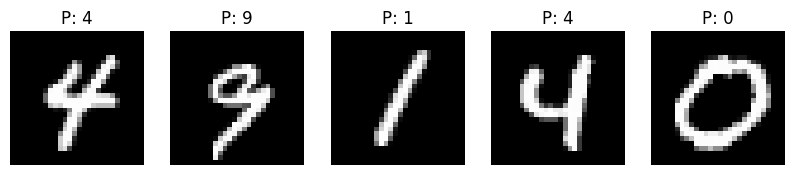

In [15]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch
import torch.nn as nn

def visualize_predictions(model_state, n_images=5):
    # Transformación igual que durante entrenamiento
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    
    test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=n_images, shuffle=True)

    # Definimos el mismo modelo que entrenamos
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )
    model.load_state_dict(model_state)
    model.eval()

    # Tomamos un batch de n_images
    images, labels = next(iter(test_loader))
    with torch.no_grad():
        outputs = model(images)
        preds = outputs.argmax(dim=1)

    # Mostrar imágenes y predicciones
    fig, axes = plt.subplots(1, n_images, figsize=(n_images*2, 2))
    for i in range(n_images):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f"P: {preds[i].item()}")
        axes[i].axis('off')
    plt.show()

# Usar la función
visualize_predictions(result, n_images=5)


In [16]:
distributor.spark

In [17]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, DistributedSampler
from pyspark.sql import SparkSession

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train():
    rank = int(os.environ["RANK"])
    world_size = int(os.environ["WORLD_SIZE"])

    torch.manual_seed(42)

    transform = transforms.Compose([transforms.ToTensor()])
    dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    sampler = DistributedSampler(dataset, num_replicas=world_size, rank=rank, shuffle=True)
    loader = DataLoader(dataset, batch_size=64, sampler=sampler)
    
    model = SimpleCNN()
    if world_size > 1:
        model = nn.parallel.DistributedDataParallel(model)

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(3):
        sampler.set_epoch(epoch) 
        for batch_idx, (data, target) in enumerate(loader):
            optimizer.zero_grad()
            output = model(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            optimizer.step()
        print(f"[Rank {rank}] Epoch {epoch} Loss {loss.item():.4f}")


world_size = 2 
distributor = distributor = TorchDistributor(
    local_mode=False,  
    use_gpu=False
)

result =distributor.run(train)


Started distributed training with 1 executor processes
Failed to download (trying next):
HTTP Error 404: Not Found

100.0%
Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

100.0%
Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

100.0%
Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found

100.0%
Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

[Rank 0] Epoch 0 Loss 0.1270                                        (0 + 1) / 1]
[Rank 0] Epoch 1 Loss 0.0016                                        (0 + 1) / 1]
[Rank 0] Epoch 2 Loss 0.0002                                        (0 + 1) / 1]
Finished distributed training with 1 executor processes                         


Started distributed training with 1 executor processes                          
Epoch 1, Loss: 0.1209                                               (0 + 1) / 1]
Epoch 2, Loss: 0.0845
Epoch 3, Loss: 0.0858
Epoch 4, Loss: 0.0838
Epoch 5, Loss: 0.0810
Finished distributed training with 1 executor processes                         



Entrenamiento distribuido finalizado.
Claves del modelo entrenado: ['0.weight', '0.bias', '2.weight', '2.bias']


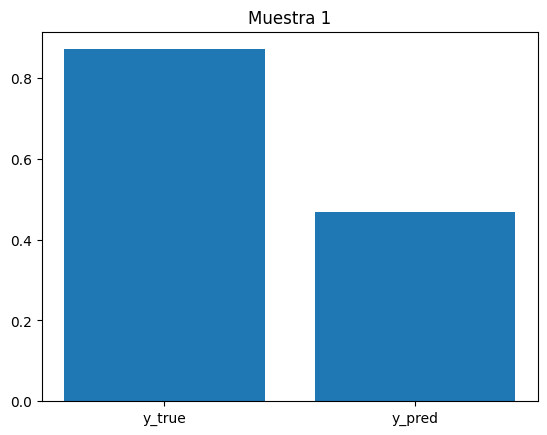

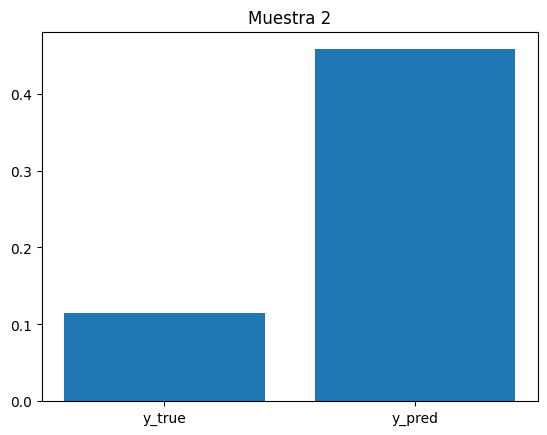

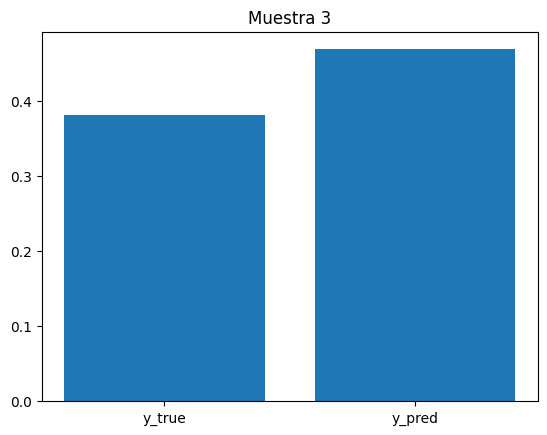

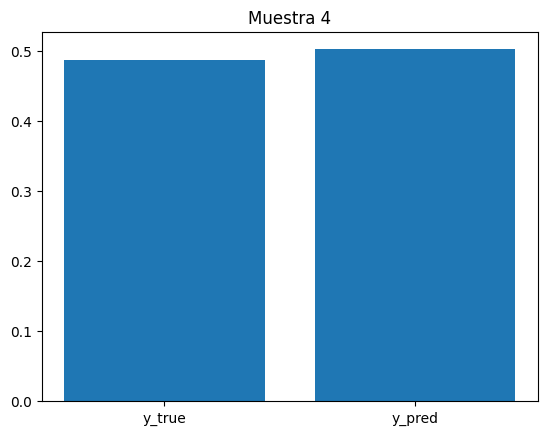

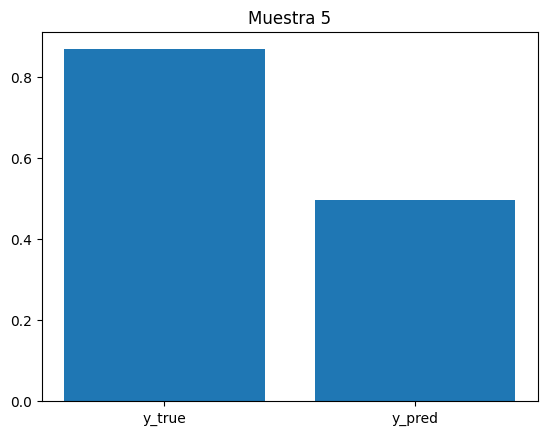

In [18]:
from pyspark.ml.torch.distributor import TorchDistributor
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from pyspark.ml.feature import VectorAssembler

# -----------------------------
# 1. Crear datos sintéticos en Spark
# -----------------------------
import pyspark.sql.functions as F
from pyspark.sql import SparkSession

# spark ya está definido
num_features = 10
num_samples = 1000

# Generamos datos sintéticos
df = spark.range(num_samples).withColumn("y", F.rand())
for i in range(num_features):
    df = df.withColumn(f"x{i}", F.rand())

# Vectorización con Spark
assembler = VectorAssembler(inputCols=[f"x{i}" for i in range(num_features)], outputCol="features")
df = assembler.transform(df)

# -----------------------------
# 2. Convertir a Dataset de PyTorch
# -----------------------------
class ListDataset(Dataset):
    def __init__(self, data_list):
        self.data_list = data_list
    def __len__(self):
        return len(self.data_list)
    def __getitem__(self, idx):
        return self.data_list[idx]

# Convertir a lista de tuplas (features_tensor, target_tensor)
data_list = df.select("features", "y").rdd.map(
    lambda row: (torch.tensor(row["features"], dtype=torch.float32),
                 torch.tensor([row["y"]], dtype=torch.float32))
).collect()

dataset = ListDataset(data_list)

# -----------------------------
# 3. Definir modelo y entrenamiento
# -----------------------------
def train_model(lr=0.01):
    model = nn.Sequential(
        nn.Linear(num_features, 64),
        nn.ReLU(),
        nn.Linear(64, 1)
    )
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    loader = DataLoader(dataset, batch_size=32, shuffle=True)
    
    for epoch in range(5):  # pocos epochs para prueba
        epoch_loss = 0.0
        for X_batch, y_batch in loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * X_batch.size(0)
        print(f"Epoch {epoch+1}, Loss: {epoch_loss/len(loader.dataset):.4f}")
    
    return model.state_dict(), model  # devolvemos también el modelo entrenado

# -----------------------------
# 4. Entrenamiento distribuido
# -----------------------------
distributor = TorchDistributor(local_mode=False, use_gpu=False)
state_dict, trained_model = distributor.run(train_model, 0.01)

print("\nEntrenamiento distribuido finalizado.")
print(f"Claves del modelo entrenado: {list(state_dict.keys())}")

# -----------------------------
# 5. Prueba con 5 muestras
# -----------------------------
import matplotlib.pyplot as plt

test_samples = dataset[:5]  # primeras 5
X_test = torch.stack([x for x, y in test_samples])
y_test = torch.stack([y for x, y in test_samples])

with torch.no_grad():
    y_pred = trained_model(X_test)

# Mostrar resultados
for i in range(5):
    plt.figure()
    plt.bar(["y_true", "y_pred"], [y_test[i].item(), y_pred[i].item()])
    plt.title(f"Muestra {i+1}")
    plt.show()


In [19]:
spark.stop()